# Project: Investigating a TMDB dataset

## Introduction

> For this project, I'd be analyzing the TMDB Dataset. In the dataset we have over 10,000 movies and various information(such as revenue, vote counts, genres, population e.t.c) on those movies

> I took notes of budget, popularity, genre as the independent variables and revenue as dependent variable.

> Some of the questions I'd be answering are:
> 1. The most popular genre over years 
> 2. Do people prefer longer or shorter runtimes?
> 3. Does budget affect the revenue?
> 4. What production companies have the highest movies produced?
> 5. Which director has the highest revenue movies?


  


In [368]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


## Data Wrangling

#### I'm going through the dataset to see if any thing needs to be done so as to get an analysis as accurate as possible


In [369]:
df = pd.read_csv('tmdb-movies.csv')

In [370]:
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [371]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [372]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [373]:
sum(df.duplicated())

1

In [374]:
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

## Data Cleaning

In [375]:
# I'd be dropping columns that I won't be needing for the analysis
df.drop(['id','imdb_id', 'cast', 'homepage', 'tagline', 'keywords', 'overview'], axis=1, inplace=True)

In [376]:
# To confirm if the columns have been dropped
df.head()

,popularity,budget,revenue,original_title,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,110000000,295238201,Insurgent,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,190000000,1506249360,Furious 7,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [377]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   popularity            10866 non-null  float64
 1   budget                10866 non-null  int64  
 2   revenue               10866 non-null  int64  
 3   original_title        10866 non-null  object 
 4   director              10822 non-null  object 
 5   runtime               10866 non-null  int64  
 6   genres                10843 non-null  object 
 7   production_companies  9836 non-null   object 
 8   release_date          10866 non-null  object 
 9   vote_count            10866 non-null  int64  
 10  vote_average          10866 non-null  float64
 11  release_year          10866 non-null  int64  
 12  budget_adj            10866 non-null  float64
 13  revenue_adj           10866 non-null  float64
dtypes: float64(4), int64(5), object(5)
memory usage: 1.2+ MB


In [378]:
# To drop duplicates
df.drop_duplicates(inplace=True)

In [379]:
# To confirm if duplicates have been removed
sum(df.duplicated())

0

In [380]:
# I'd be dropping rows with null values
df.dropna(inplace=True)

In [381]:
# Checking the info of the dataframe to confirm the drop
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9806 entries, 0 to 10865
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   popularity            9806 non-null   float64
 1   budget                9806 non-null   int64  
 2   revenue               9806 non-null   int64  
 3   original_title        9806 non-null   object 
 4   director              9806 non-null   object 
 5   runtime               9806 non-null   int64  
 6   genres                9806 non-null   object 
 7   production_companies  9806 non-null   object 
 8   release_date          9806 non-null   object 
 9   vote_count            9806 non-null   int64  
 10  vote_average          9806 non-null   float64
 11  release_year          9806 non-null   int64  
 12  budget_adj            9806 non-null   float64
 13  revenue_adj           9806 non-null   float64
dtypes: float64(4), int64(5), object(5)
memory usage: 1.1+ MB


## Exploratory Data Analysis


### 1. The most popular genre over years

In [382]:
# To be able to use the genres column, we need to split it using the separator
df.genres = df['genres'].str.split("|", expand=True)

In [383]:
df.head()

,popularity,budget,revenue,original_title,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Action,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,120,Action,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,110000000,295238201,Insurgent,Robert Schwentke,119,Adventure,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,136,Action,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,190000000,1506249360,Furious 7,James Wan,137,Action,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [384]:
# Group the dataset by the release year and then by the genres and then give the mean popularity
df.groupby(['release_year', 'genres'])['popularity'].mean()

release_year  genres         
1960          Action             0.590724
              Adventure          0.304992
              Comedy             0.392067
              Crime              0.269428
              Drama              0.687575
                                   ...   
2015          Science Fiction    1.472101
              TV Movie           0.292459
              Thriller           0.658329
              War                2.131503
              Western            4.929120
Name: popularity, Length: 816, dtype: float64

In [385]:
# put the level we need to groupby as release year or '0' and return the 1st largest number in the group
# by using the .nlargest function
df.groupby(['release_year', 'genres'])['popularity'].mean().groupby(level=0).nlargest(1)

release_year  release_year  genres         
1960          1960          Drama              0.687575
1961          1961          Adventure          1.394596
1962          1962          Adventure          1.283631
1963          1963          Animation          2.180410
1964          1964          Adventure          0.736431
1965          1965          Adventure          1.121328
1966          1966          Animation          1.227582
1967          1967          Family             2.550704
1968          1968          Science Fiction    2.088194
1969          1969          History            1.357317
1970          1970          Animation          1.936962
1971          1971          Family             2.430667
1972          1972          Drama              1.495163
1973          1973          Adventure          1.549139
1974          1974          Adventure          0.842025
1975          1975          Drama              1.044668
1976          1976          Crime              2.582657
1977

In [386]:
# To prevent the extra row, we reset the index
df1=df.groupby(['release_year', 'genres'])['popularity'].mean().groupby(level=0).nlargest(1).reset_index(level=0, drop=True)

In [387]:
df1

release_year  genres         
1960          Drama              0.687575
1961          Adventure          1.394596
1962          Adventure          1.283631
1963          Animation          2.180410
1964          Adventure          0.736431
1965          Adventure          1.121328
1966          Animation          1.227582
1967          Family             2.550704
1968          Science Fiction    2.088194
1969          History            1.357317
1970          Animation          1.936962
1971          Family             2.430667
1972          Drama              1.495163
1973          Adventure          1.549139
1974          Adventure          0.842025
1975          Drama              1.044668
1976          Crime              2.582657
1977          Adventure          3.762110
1978          Music              1.697618
1979          Horror             1.021005
1980          Music              1.607219
1981          Adventure          1.359776
1982          Science Fiction    1.685049
1983

#### Now that we have the most popular genres by year we can visualize it

In [388]:
# A scatter plot would be effective for visualizing 'df1' so we have to convert it to 
# a panda dataframe from panda series
df1 = df1.to_frame().reset_index()

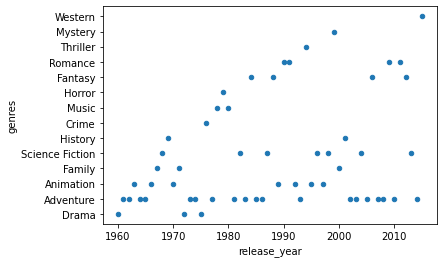

In [389]:
df1.plot(x='release_year', y='genres', kind='scatter');

##### The most popular genre over the years turns to be Adventure because it has the most points on the scatterplot over the years

We can also check the value counts for df1 to see how many times each genre was the most popular over the years

In [390]:
df_1=df1.value_counts('genres')

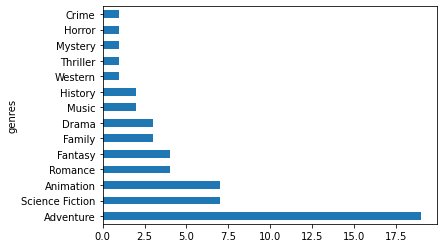

In [391]:
df_1.plot(x='release_year', y='genres', kind='barh');

The genre that has been the most popular over the years is 'Adventure'

### 2. Do people prefer longer or shorter runtimes?

In [392]:
# filter rows where runtime is zero
df = df.loc[df['runtime'] != 0]

In [393]:
df.describe().runtime

count    9793.000000
mean      102.880731
std        27.902884
min         2.000000
25%        90.000000
50%       100.000000
75%       112.000000
max       877.000000
Name: runtime, dtype: float64

##### Group the runtime based on the description of the column in the cell above
1. short: Lowest 25% of runtime values
2. slightly_average: 25% - 50% of runtime values
3. average: 50% - 75% of runtime values
4. long: 75% - max runtime values

In [394]:
# Bin edges that will be used to "cut" the data into groups
bin_edges = [ 2.000000, 90.000000, 100.000000, 112.000000 ,877.000000] # Fill in this list with five values we just got(min - max)

In [395]:
# Labels for the runtime groups
bin_names = [ 'short', 'slightly_average', 'average', 'long' ] # Name each runtime level category

In [396]:
# Create runtime_length column
df['runtime_length'] = pd.cut(df['runtime'], bin_edges, labels=bin_names)

# Checks for successful creation of this column
df.head()

,popularity,budget,revenue,original_title,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,runtime_length
0,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Action,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,long
1,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,120,Action,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08,long
2,13.112507,110000000,295238201,Insurgent,Robert Schwentke,119,Adventure,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08,long
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,136,Action,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09,long
4,9.335014,190000000,1506249360,Furious 7,James Wan,137,Action,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09,long


In [397]:
# Find the mean popularity of each runtime_length level with groupby
df2= df.groupby('runtime_length' , as_index=False)['popularity'].mean()

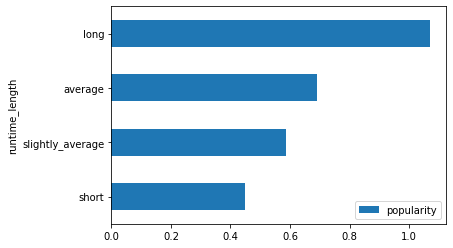

In [398]:
df2.plot(x='runtime_length', y='popularity', kind='barh');

The chart above shows that people prefer movies with Longer runtimes compared to shorter ones

### 3. Does higher budget mean higher revenue? 

In [399]:
# filter rows where budget is zero
df = df.loc[df['budget'] != 0]

In [400]:
df.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,5028.000000,5.028000e+03,5.028000e+03,5028.000000,5028.000000,5028.000000,5028.000000,5.028000e+03,5.028000e+03
mean,1.013525,3.144808e+07,8.246694e+07,107.485084,419.446897,6.044869,2001.131265,3.773865e+07,1.049750e+08
std,1.341411,3.919653e+07,1.611621e+08,22.443891,796.604600,0.867468,11.849341,4.220080e+07,1.979259e+08
min,0.002514,1.000000e+00,0.000000e+00,4.000000,10.000000,1.500000,1960.000000,9.210911e-01,0.000000e+00
25%,0.361561,6.100000e+06,5.390250e+03,94.000000,39.000000,5.500000,1995.000000,8.851983e+06,5.251596e+03
50%,0.640990,1.800000e+07,2.298185e+07,103.000000,130.000000,6.100000,2004.000000,2.370705e+07,3.129805e+07
75%,1.177582,4.000000e+07,9.291518e+07,117.000000,415.000000,6.600000,2010.000000,5.082002e+07,1.167414e+08
max,32.985763,4.250000e+08,2.781506e+09,540.000000,9767.000000,8.400000,2015.000000,4.250000e+08,2.827124e+09


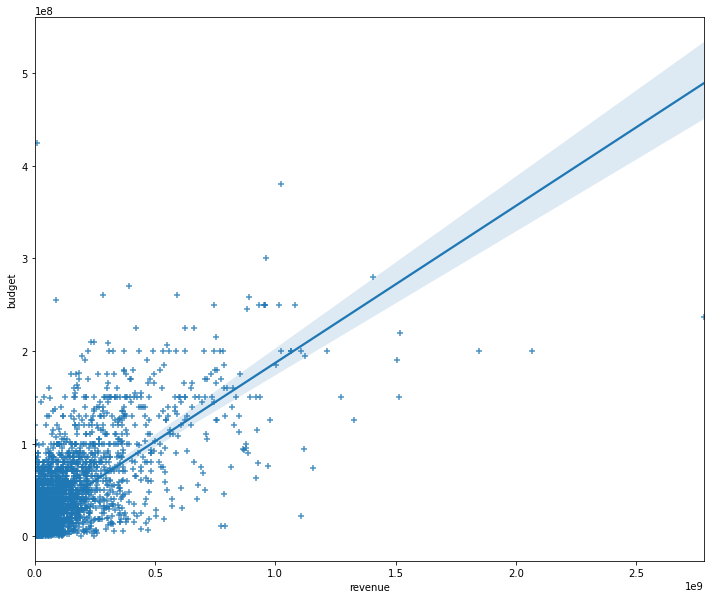

In [401]:
# check the correlation between budget and revenue using a  regplot
a = sns.regplot(x=df['revenue'], y=df['budget'], marker='+')
a.figure.set_size_inches(12,10)

Yes, higher budget means higher revenue. More expensive movies are likely to generate more money

### 4. Top 10 directors with the highest revenue movies?

In [402]:
# Split and explode the 'director' column
df.director = df['director'].str.split("|", expand=True)

In [403]:
# remove rows where revenue is zero
df3 = df.loc[df['revenue'] != 0]

In [404]:
df3.describe().revenue

count    3.807000e+03
mean     1.089161e+08
std      1.772686e+08
min      2.000000e+00
25%      1.425795e+07
50%      4.620143e+07
75%      1.260554e+08
max      2.781506e+09
Name: revenue, dtype: float64

In [405]:
# group the dataframe by director and return the sum revenue of all the movies directed by them
df3.groupby('director')['revenue'].sum()

director
 FrÃ©dÃ©ric Jardin          3358
Aaron Blaise                 250
Aaron Seltzer           48548426
Abbas Tyrewala          11100000
Abe Sylvia                 55125
                         ...    
Yorgos Lanthimos         9064511
Zach Braff              32265022
Zack Snyder           1602937193
Zal Batmanglij           2401510
Ã‰mile Gaudreault        3031801
Name: revenue, Length: 1618, dtype: int64

In [406]:
# use the nlargest to get the top 10 directors with highest revenue movies
df3.groupby('director')['revenue'].sum().nlargest(10)

director
Steven Spielberg     9018563772
Peter Jackson        6523244659
James Cameron        5841894863
Michael Bay          4917208171
Christopher Nolan    4167548502
David Yates          4154295625
Robert Zemeckis      3869690869
Tim Burton           3782609685
Chris Columbus       3725631503
Ridley Scott         3584430808
Name: revenue, dtype: int64

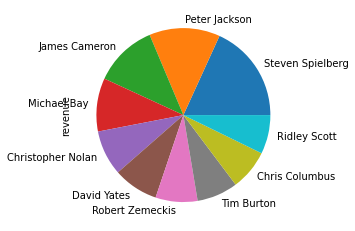

In [407]:
# make a piechart from the dataframe
df3.groupby('director')['revenue'].sum().nlargest(10).plot(kind='pie');

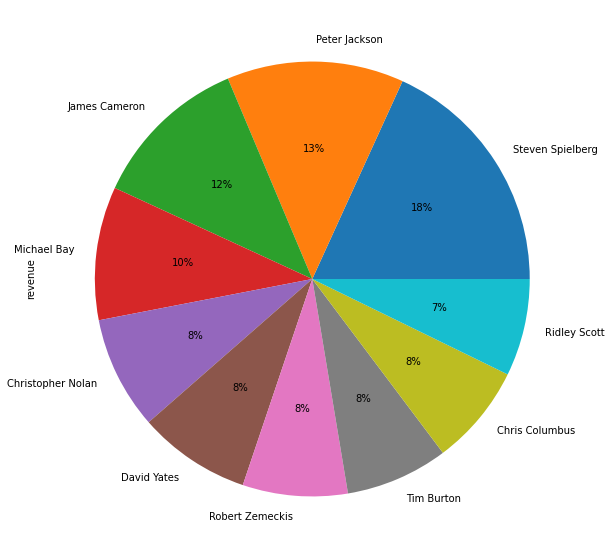

In [408]:
# add percentages to the pie chart and make it bigger
df3.groupby('director')['revenue'].sum().nlargest(10).plot(kind='pie', autopct='%1.0f%%', figsize=(10,10));

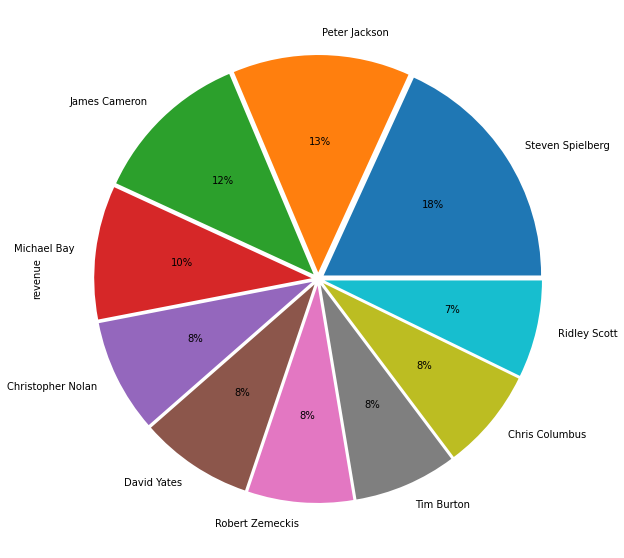

In [409]:
# use the explode function to segment the piechart
explode =(0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03,)
df3.groupby('director')['revenue'].sum().nlargest(10).plot(kind='pie', autopct='%1.0f%%', figsize=(10,10), explode=explode);

The pie chart shows the top 10 directors with the highest movie revenues in an anti-clockwise direction

### 5. What production companies have the highest movies produced?

This question is just similar to how many times did each production company appear

In [411]:
# we split the 'production companies' column  and expand it
df.production_companies = df['production_companies'].str.split("|", expand=True)

In [412]:
df.head()

,popularity,budget,revenue,original_title,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,runtime_length
0,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Action,Universal Studios,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,long
1,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,120,Action,Village Roadshow Pictures,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08,long
2,13.112507,110000000,295238201,Insurgent,Robert Schwentke,119,Adventure,Summit Entertainment,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08,long
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,136,Action,Lucasfilm,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09,long
4,9.335014,190000000,1506249360,Furious 7,James Wan,137,Action,Universal Pictures,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09,long


In [423]:
# return the top 5 most occuring production_companies
df.value_counts('production_companies').nlargest(5)

production_companies
Universal Pictures                        310
Paramount Pictures                        301
Columbia Pictures                         203
Twentieth Century Fox Film Corporation    174
New Line Cinema                           154
dtype: int64

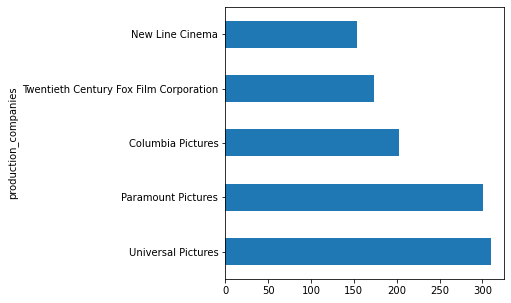

In [429]:
# plot an histogram
df.value_counts('production_companies').nlargest(5).plot(kind='barh', figsize=(5,5));

The top 5 production companies with the most movies produced are Universal Pictures, Paramount Pictures, Columbia Pictures, Twentieth Century Fox Film Corporation & New Line Cinema  .

## Conclusions

After cleaning the dataset, we set to analyze it and answer the questions already stated at the beginning.

I found the most popular genre of movie from 1960 to 2015 as given in the dataset was Adventure; People also preferred movies with longer runtimes compared to shorter ones; If you want your movie to come out with high revenue, you need to up the budget too; A director that might be able to increse the revenue of your movie would be 'Steven Speilberg' considering he's the director with the highest revenue movies

Imagine you're a producer and you want to make a succesful movie, some things that might increase the chances are the genre('Adventure'), the runtime(Long movie), the director and the budget of the movie

The production company with the most movies produced is Universal pictures and this might be because of the high revenue or popularity attached to the movies produced but further analysis wasn't done to confirm or reject this thought

## Limitations

1. Almost all movie, if not all has multiple genres and multiple production companies
2. Some movies have 0 runtime which is impossible
3. Some movies also had 0 budget and 0 revenue which is very unlikely
4. I filtered out rows with 0 revenue, budget, runtime at a point in the analysis
5. I also used different dataframes to answer some questions so as not to overclean the dataset.